# Example, Cao Bin, Jul 8 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel

In [2]:
import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


# It's a noise-free example

## 1 : input the dataset 

In [3]:
data = pd.read_csv('data.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

## 2 : design virtual samples

In [4]:
# searching domain is [0,11]
virtual_samples = np.linspace(0,11,100)

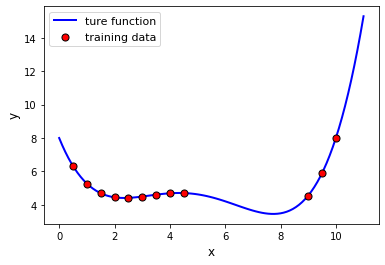

In [5]:
# true function 
def function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

plt.figure()
ax1 = plt.subplot()
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

## 3 : define a callable Kriging model

##  (see part 5) call the internal model of Bgolearn directly

In [6]:
"""
Kriging_model: 
a defined callable Kriging model, has an attribute of <fit_pre>
atribute <fit_pre> : 
input -> xtrain, ytrain, xtest;
output -> predicted mean and std of xtest
e.g.
"""

"""
if user do not defined one
Bgolearn package will call the internal krigging modle automatically
see part 5
"""

class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() + WhiteKernel()
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std    

## 4 : give the next recommendation by Bgolearn

+ Expected Improvement 

current optimal is : 4.4140625
The next datum recomended by Expected Improvement : 
 x =  [6.44444444]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


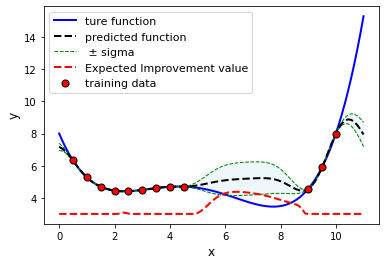

In [8]:
plt.figure()
ax1 = plt.subplot()

y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± sigma') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(data_matrix = data_matrix,Measured_response = Measured_response ,
                     virtual_samples = virtual_samples,Kriging_model = Kriging_model, 
                     opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.EI()*10 + 3,'r--',lw=2,label='Expected Improvement value')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

+ Expected improvement with “plugin”

current optimal is : 4.413848889776276
The next datum recomended by Expected Improvement with plugin : 
 x =  [6.44444444]


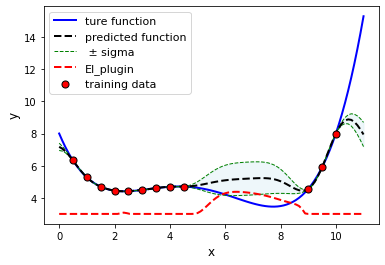

In [9]:
plt.figure()
ax1 = plt.subplot()

y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± sigma') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
model = Bgolearn.fit(data_matrix = data_matrix,Measured_response = Measured_response ,
                     virtual_samples = virtual_samples,Kriging_model = Kriging_model, 
                     opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.EI_plugin()*10 + 3,'r--',lw=2,label='EI_plugin')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

+ Augmented Expected Improvement 

current optimal is : 4.413848889776276
The next datum recomended by Augmented_EI : 
 x =  [6.44444444]


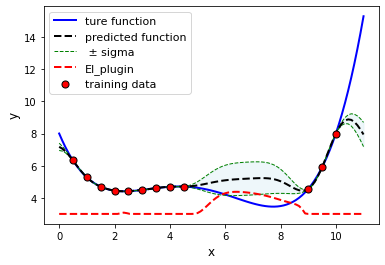

In [10]:
plt.figure()
ax1 = plt.subplot()

y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± sigma') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
model = Bgolearn.fit(data_matrix = data_matrix,Measured_response = Measured_response ,
                     virtual_samples = virtual_samples,Kriging_model = Kriging_model, 
                     opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.Augmented_EI(alpha = 1, tao = 0)*10 + 3,'r--',lw=2,label='EI_plugin')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

+ Expected Quantile Improvement

current optimal is : 4.413848889776276
The next datum recomended by Expected Quantile Improvement : 
 x =  [6.44444444]


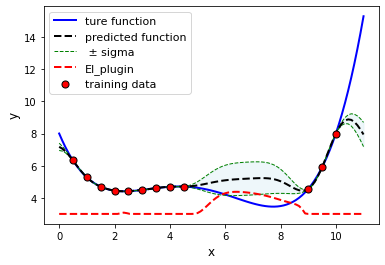

In [11]:
plt.figure()
ax1 = plt.subplot()

y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± sigma') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
model = Bgolearn.fit(data_matrix = data_matrix,Measured_response = Measured_response ,
                     virtual_samples = virtual_samples,Kriging_model = Kriging_model, 
                     opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.EQI(beta = 0.5,tao_new = 0)*10 + 3,'r--',lw=2,label='EI_plugin')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

+ Reinterpolation Expected Improvement

current optimal is : 4.413848889776276
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [6.44444444]


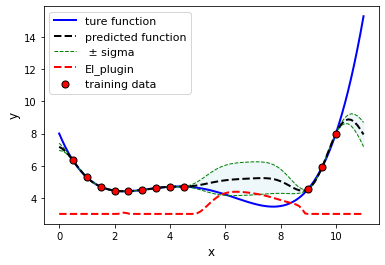

In [12]:
plt.figure()
ax1 = plt.subplot()

y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± sigma') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
model = Bgolearn.fit(data_matrix = data_matrix,Measured_response = Measured_response ,
                     virtual_samples = virtual_samples,Kriging_model = Kriging_model, 
                     opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.Reinterpolation_EI()*10 + 3,'r--',lw=2,label='EI_plugin')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

+ Upper confidence bound

The next datum recomended by Upper confidence bound  : 
 x =  [6.33333333]


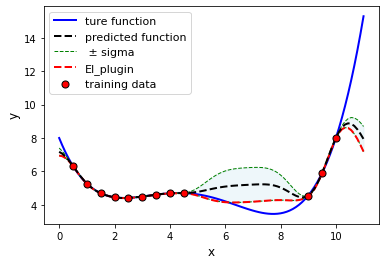

In [14]:
plt.figure()
ax1 = plt.subplot()

y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± sigma') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
model = Bgolearn.fit(data_matrix = data_matrix,Measured_response = Measured_response ,
                     virtual_samples = virtual_samples,Kriging_model = Kriging_model, 
                     opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.UCB(alpha=1) ,'r--',lw=2,label='EI_plugin')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

+ Probability of Improvement

current optimal is : 4.4140625
The next datum recomended by Probability of Improvement  : 
 x =  [2.33333333]


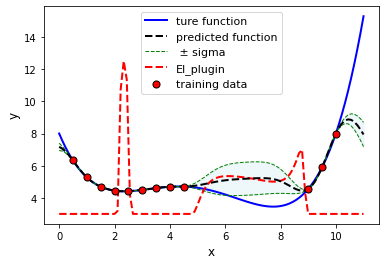

In [15]:
plt.figure()
ax1 = plt.subplot()

y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± sigma') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
model = Bgolearn.fit(data_matrix = data_matrix,Measured_response = Measured_response ,
                     virtual_samples = virtual_samples,Kriging_model = Kriging_model, 
                     opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PoI(tao = 0)*10 + 3 ,'r--',lw=2,label='EI_plugin')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

+ Predictive Entropy Search

The next datum recomended by Predictive Entropy Search  : 
 x =  [6.55555556]


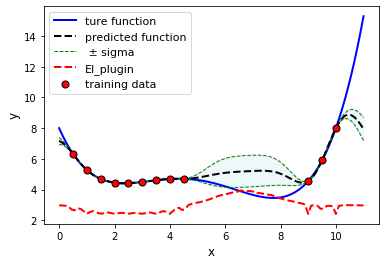

In [16]:
plt.figure()
ax1 = plt.subplot()

y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± sigma') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
model = Bgolearn.fit(data_matrix = data_matrix,Measured_response = Measured_response ,
                     virtual_samples = virtual_samples,Kriging_model = Kriging_model, 
                     opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PES(sam_num = 500) + 3 ,'r--',lw=2,label='EI_plugin')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

+ Knowledge Gradient

The 2000-th Monte carol simulation
The 4000-th Monte carol simulation
The 6000-th Monte carol simulation
The 8000-th Monte carol simulation
The 10000-th Monte carol simulation
The 12000-th Monte carol simulation
The 14000-th Monte carol simulation
The 16000-th Monte carol simulation
The 18000-th Monte carol simulation
The 20000-th Monte carol simulation
The 22000-th Monte carol simulation
The 24000-th Monte carol simulation
The 26000-th Monte carol simulation
The 28000-th Monte carol simulation
The 30000-th Monte carol simulation
The 32000-th Monte carol simulation
The 34000-th Monte carol simulation
The 36000-th Monte carol simulation
The 38000-th Monte carol simulation
The 40000-th Monte carol simulation
The 42000-th Monte carol simulation
The 44000-th Monte carol simulation
The 46000-th Monte carol simulation
The 48000-th Monte carol simulation
The 50000-th Monte carol simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.33333333]


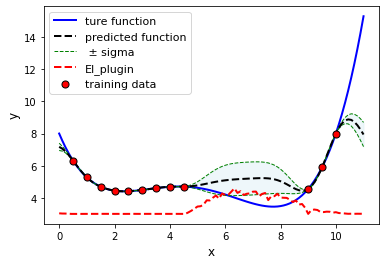

In [18]:
plt.figure()
ax1 = plt.subplot()

y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± sigma') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
model = Bgolearn.fit(data_matrix = data_matrix,Measured_response = Measured_response ,
                     virtual_samples = virtual_samples,Kriging_model = Kriging_model, 
                     opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.Knowledge_G(MC_num = 500)*10 + 3 ,'r--',lw=2,label='EI_plugin')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

## 5 : excuse Bgolearn without defined Krigging model

In [4]:
import numpy as np
import pandas as pd
import Bgolearn.BGOsampling as BGOS 

# import dataset
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

# define searching space
virtual_X = np.linspace(0,11,100)

# call Bgolearn
Bgolearn = BGOS.Bgolearn()
My_BGO = Bgolearn.fit(data_matrix = X,Measured_response = Y ,
                     virtual_samples = virtual_X,opt_num = 1,min_search = True)

# take EI for example
My_BGO.EI()

The internal model is instantiated with homogenous noise: 1e-05
current optimal is : 4.4140625
The next datum recomended by Expected Improvement : 
 x =  [6.44444444]


array([7.46387987e-037, 6.99889470e-074, 2.01531776e-185, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.21926544e-013,
       3.92221127e-003, 8.11237414e-003, 4.34569157e-003, 2.47345072e-016,
       5.63626118e-026, 1.01386645e-058, 1.47544759e-276, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.73263595e-165, 6.00265459e-126,
       0.00000000e+000, 5.24274186e-199, 1.86910345e-016, 2.68947993e-006,
       5.91369801e-004, 4.95468677e-003, 1.50526022e-002, 2.97392217e-002,
       4.69645482e-002, 6.48413792e-002, 8.18918112e-002, 9.70814600e-002,
       1.09799821e-001, 1

In [6]:
# take KG for example
My_BGO.Knowledge_G(MC_num = 5)

The next datum recomended by Knowledge Gradient : 
 x =  [6.44444444]


array([-1.14223959e-04, -1.06104480e-02, -5.14579333e-04,  9.67109590e-04,
       -6.37699631e-03, -2.56162673e-02, -2.53088532e-02, -1.63746732e-02,
       -1.76138273e-02,  4.43309867e-04, -2.55037639e-02, -9.92638590e-03,
       -8.70211792e-03, -1.27078508e-03, -1.60972675e-02, -8.65873261e-03,
       -2.50117928e-02, -1.71066356e-02,  3.12406583e-04, -9.44125833e-03,
       -9.46384713e-04,  1.94050292e-03, -1.31796577e-03, -3.16531718e-03,
       -6.68882799e-03, -1.77303646e-02, -5.89853782e-04,  3.33559147e-04,
       -2.56598320e-02, -1.80579506e-02, -8.61656778e-03, -6.55048561e-04,
       -8.41728415e-03, -8.93562597e-03, -1.73949027e-02, -1.73572985e-02,
        4.09839858e-04, -1.74295268e-02, -9.09280108e-03, -8.09624804e-03,
       -5.86477800e-03, -8.54505993e-03, -1.69606699e-02,  2.61821182e-02,
       -7.68999378e-03,  1.95536024e-02, -6.76889090e-03,  2.26330464e-02,
        4.64756359e-04,  4.67804372e-06,  2.21350104e-02,  3.46644060e-02,
        8.03963325e-02,  